# 🛒 Retail Sales Data Analysis Project
### 🎯 Objective:
To analyze retail sales data to uncover trends, performance insights, and actionable business recommendations to improve decision-making and drive revenue growth.


Importing Libereries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

Uploading Dataset 

In [2]:
df = pd.read_csv('train.csv')

EDA(Exploratory Data Analysis)
Exploring the Dataset..

In [4]:
df.head()         # exploring the first rows
df.tail()         # exploring the last rows 
df.sample(10)     # exploring random rows
df.shape          
df.shape[0]       
df.shape[1]
df.info()         # to know the summary of the dataset 
df.describe()     # Describe the Statistical Summary of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


1.. The Explored dataset is about the sales of a SuperStore having  .____9800 Rows and 18 columns, 
2.. The summary of this dataset describing the rows, columns and ____column's datatype  
3.. Describe() desribing the Statistical Summary of the dataset
    (Numerical Columns, such-count,mean,max,min,std and quantile etc.)
 

Checking-up for the missing(null) and duplicated values

In [5]:
df.isnull().sum().sum()  # Searching for missing values
df.duplicated().sum()    # Searching for same rows
df[['Customer ID','Customer Name']].duplicated().sum() 
#df.dtypes                # Checking the datatype
                                #df['Ship Date']                          

np.int64(9007)

Managing Misisng values...

In [6]:
id = df.isnull().sum().sum()
[id.any(axis=0)].index 
df[df.isnull().any(axis=1)].index

(df.isnull().sum()/df.shape[0])*100       #Missing values %age per column
(df.isnull().sum().sum()/df.shape[0])*100  #Missing values %age in overall dataseet


np.float64(0.11224489795918367)

->> The overall dataset having 0.11224489795918367 percernt missing Values
->> WE will simply remove the rows having null values expect to fill them
->> Because the %age of null values is very low, which can't affect of Insights

In [7]:
# droping the null values 
df = df.dropna()
# Verififcation for droped null values
df.isnull().sum().sum()

np.int64(0)

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')
#df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


C:\Users\abc\AppData\Local\Temp\ipykernel_2928\3068492257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
C:\Users\abc\AppData\Local\Temp\ipykernel_2928\3068492257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')


Salaes Distribution

Text(0.5, 1.0, 'Sales Distribution')

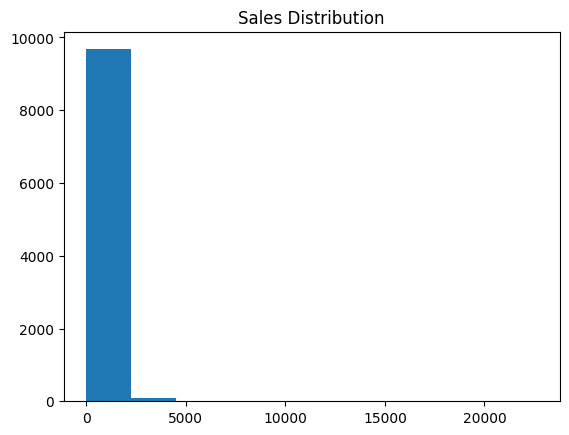

In [33]:
plt.hist(df['Sales'])     
plt.title('Sales Distribution')

In [57]:
#df.loc[df['Sales']>10000,['Sales','Product Name']].value_counts()
#df['Product Name'].value_counts()

In [72]:
df['Customer Name'].unique()
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
df['Customer Name'].value_counts().sort_values(ascending=False).head(10)
df['Segment'].value_counts()

Total Revenue 2015 to 2018

In [10]:
df['Sales'].sum()

np.float64(2252607.4127)

### 🧾 Sales Contribution by Product
What % of sales comes from which sub-category or product.



<Axes: ylabel='Sales'>

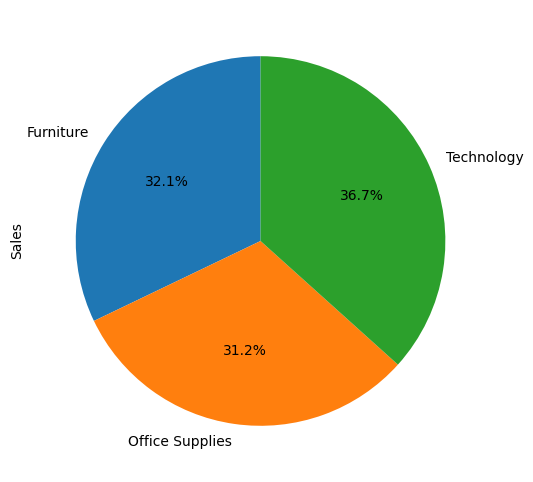

In [11]:
Category_Revenue = df.groupby('Category')['Sales'].sum()
Category_Revenue.sort_values(ascending=False)
Category_Revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), startangle=90)
          

Use for Growth: Optimize product portfolio by focusing on high-contribution areas.

### Top Revenue Generator Categories and Items

<Axes: ylabel='Category,Sub-Category'>

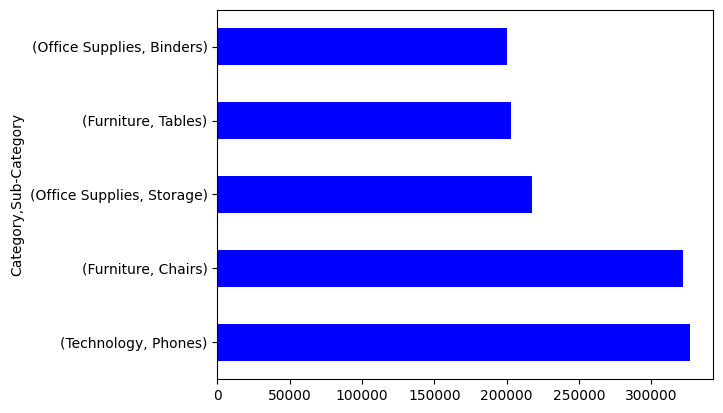

In [12]:
Sc_grouped = df.groupby(['Category','Sub-Category'])['Sales'].sum().sort_values(ascending=False).head()
Sc_grouped.plot(kind = 'barh', color='blue')


Use for Growth: Focus marketing on top-sellers; increase inventory and bundle high-selling items.

### Lowest Revenue Generator Categories along their Items

<Axes: ylabel='Category,Sub-Category'>

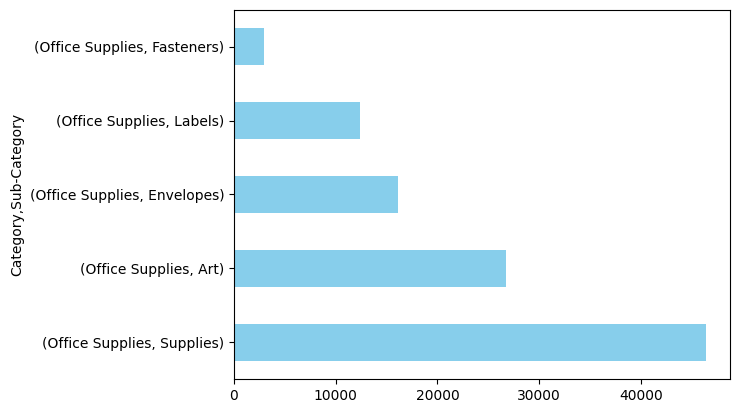

In [13]:
Sc_grouped = df.groupby(['Category','Sub-Category'])['Sales'].sum().sort_values(ascending=False).tail()
Sc_grouped.plot(kind = 'barh', color='Skyblue')

Use for Growth: Remove or improve low-selling items; reduce storage and inventory costs.

### Highest order placing Cutomers IDs

<Axes: xlabel='Customer ID'>

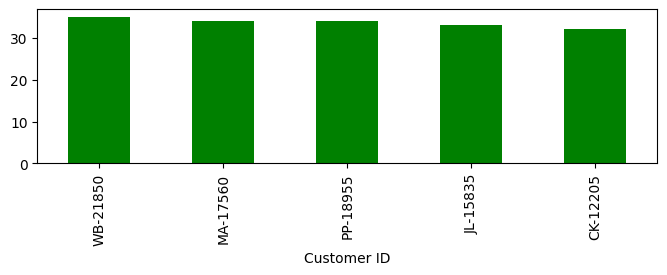

In [14]:
times_of_order_per_id = df['Customer ID'].value_counts().sort_values(ascending=False).head()
times_of_order_per_id.plot(kind='bar',color='green',figsize=(8,2))


Use for Growth: Design segment-specific marketing campaigns or discounts.

### Analyze where the company is performing well or poorly.

In [15]:

city_sales = df.groupby(['City', 'State'], as_index=False)['Sales'].sum()

# Step 2: Sort by highest sales and keep top 50 cities
top_cities = city_sales.sort_values(by='Sales', ascending=False).head(50).copy()

# Step 3: Manually map lat/lon for top cities (mock values or real values if known)
city_coords = {
    ('Los Angeles', 'California'): (34.05, -118.25),
    ('Chicago', 'Illinois'): (41.88, -87.63),
    ('New York', 'New York'): (40.71, -74.01),
    ('Fort Lauderdale', 'Florida'): (26.12, -80.14),
    ('Toledo', 'Ohio'): (41.66, -83.55),
    ('Henderson', 'Kentucky'): (37.84, -87.59),
    ('San Francisco', 'California'): (37.77, -122.42),
    ('Seattle', 'Washington'): (47.61, -122.33),
    ('Houston', 'Texas'): (29.76, -95.37),
    ('Phoenix', 'Arizona'): (33.45, -112.07),
    # Add more top city coordinates if needed
}

# Step 4: Assign lat/lon to top cities (drop missing)
top_cities['Latitude'] = top_cities.apply(lambda row: city_coords.get((row['City'], row['State']), (None, None))[0], axis=1)
top_cities['Longitude'] = top_cities.apply(lambda row: city_coords.get((row['City'], row['State']), (None, None))[1], axis=1)
top_cities.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Step 5: Plot the city sales on a geo map
fig = px.scatter_geo(
    top_cities,
    lat='Latitude',
    lon='Longitude',
    size='Sales',
    color='Sales',
    hover_name='City',
    hover_data={'State': True, 'Sales': ':.2f'},
    scope='usa',
    projection='albers usa',
    color_continuous_scale='Oranges',
    title='Top 50 U.S. Cities by Sales (Bubble Map)'
)

fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(
    geo=dict(showland=True, landcolor='lightgray'),
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


Use for Growth: Invest in advertising, warehouses, or delivery services in high-performing regions.

<Axes: ylabel='State,City,Category'>

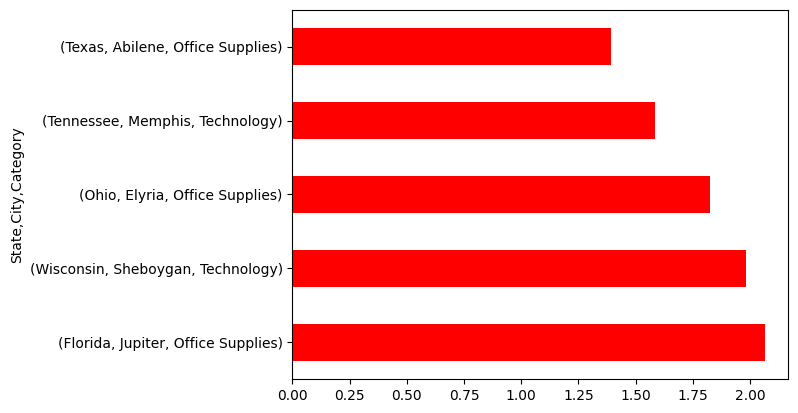

In [16]:
min_reveuve_by_city = df.groupby(['State','City','Category'])['Sales'].sum().sort_values(ascending=False).tail()
min_reveuve_by_city.plot(kind='barh',color='red')

 Boost marketing in low-performing areas ^^^.

###  See which shipping modes (Standard, Second Class, etc.) are most used and whether they affect sales or customer satisfaction.

C:\Users\abc\AppData\Local\Temp\ipykernel_2928\1594013160.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



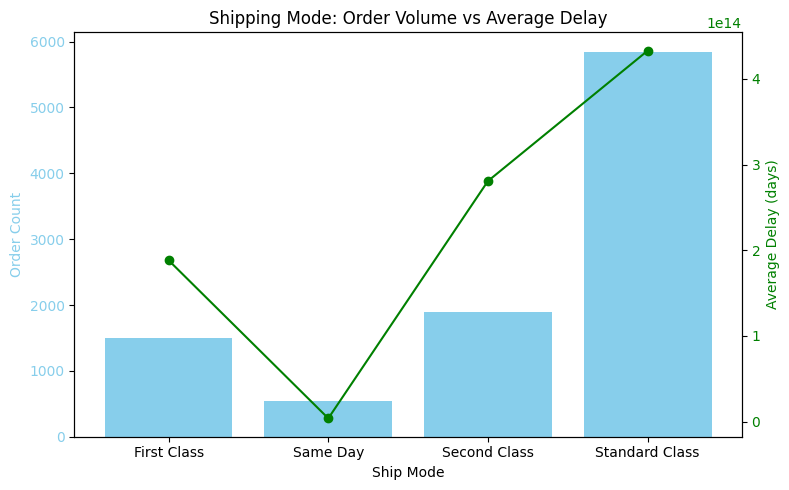

In [17]:

ship_mode = df['Ship Mode'].value_counts()
df['Shipping delay'] = df['Ship Date'] - df['Order Date']
delay = df.groupby('Ship Mode').agg({'Shipping delay':'mean','Ship Mode':'count'})

delay
delay.columns = ['Average Delay', 'Order Count']
fig, ax1 = plt.subplots(figsize=(8,5))

# Bar chart for Order Count
ax1.bar(delay.index, delay['Order Count'], color='skyblue', label='Order Count')
ax1.set_ylabel('Order Count', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xlabel('Ship Mode')

# Line chart for Average Delay
ax2 = ax1.twinx()
ax2.plot(delay.index, delay['Average Delay'], color='green', marker='o', label='Average Delay')
ax2.set_ylabel('Average Delay (days)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Shipping Mode: Order Volume vs Average Delay")
fig.tight_layout()
plt.show()


### Insight: Shipping Delay by Ship Mode

- 'Same Day' has the lowest delay.
- 'Standard Class' has the highest average delay.

**Suggestion:** Use faster modes for urgent deliveries. Improve 'Standard Class' delivery process.


### 📆 Seasonal Trends (Order Date / Ship Date)
Insight: Discover peak sales year (like holidays, year-end).

C:\Users\abc\AppData\Local\Temp\ipykernel_2928\2795351197.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\abc\AppData\Local\Temp\ipykernel_2928\2795351197.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



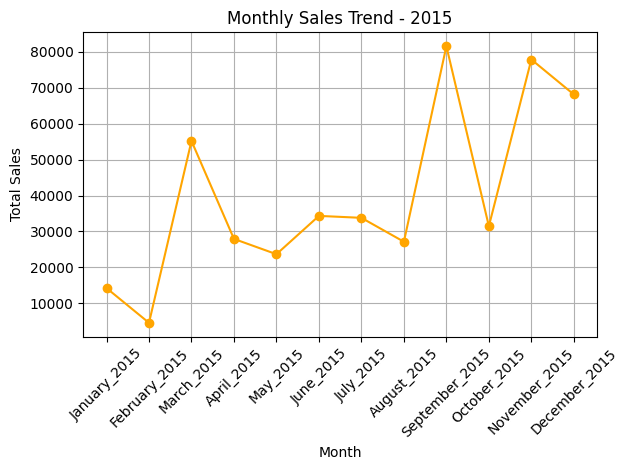

In [18]:

df['year'] = df['Order Date'].dt.year

# Filter data for the year 2015
df1 = df.loc[df['year'] == 2015]

# Extract month name
df1['month'] = df1['Order Date'].dt.month_name()

# Group by month and year, calculate total sales
monthly_sales_2015 = df1.groupby(['month', 'year'])['Sales'].sum().reset_index()
monthly_sales_2015.sort_values(by='Sales', ascending=False)

# Combine month and year for x-axis
monthly_sales_2015['month'] = monthly_sales_2015['month'].astype(str) + '_' + monthly_sales_2015['year'].astype(str)

# Define proper month order for 2015
month_order = ['January_2015', 'February_2015', 'March_2015', 'April_2015', 'May_2015', 'June_2015',
               'July_2015', 'August_2015', 'September_2015', 'October_2015', 'November_2015', 'December_2015']

monthly_sales_2015['month'] = pd.Categorical(monthly_sales_2015['month'], categories=month_order, ordered=True)
monthly_sales_2015 = monthly_sales_2015.sort_values('month')

# Line chart
plt.plot(monthly_sales_2015['month'], monthly_sales_2015['Sales'], marker='o', color='orange')
plt.title("Monthly Sales Trend - 2015")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Insight: Monthly Sales Trend in 2015
- The highest sales occurred in **September**.
- The lowest sales were in **February**.
- This trend helps in planning seasonal inventory and marketing.


C:\Users\abc\AppData\Local\Temp\ipykernel_2928\3944569480.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\abc\AppData\Local\Temp\ipykernel_2928\3944569480.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



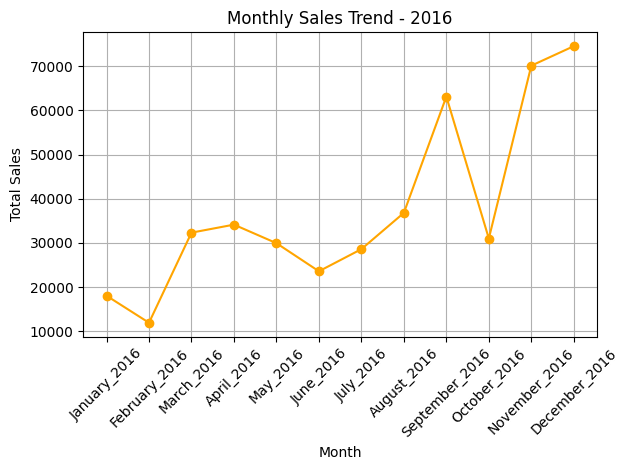

In [19]:

df['year'] = df['Order Date'].dt.year

# Filter data for the year 2016
df1 = df.loc[df['year'] == 2016]

# Extract month name
df1['month'] = df1['Order Date'].dt.month_name()

# Group by month and year, calculate total sales
monthly_sales_2016 = df1.groupby(['month', 'year'])['Sales'].sum().reset_index()
monthly_sales_2016.sort_values(by='Sales', ascending=False)

# Combine month and year for x-axis
monthly_sales_2016['month'] = monthly_sales_2016['month'].astype(str) + '_' + monthly_sales_2016['year'].astype(str)

# Define proper month order for 2016
month_order = ['January_2016', 'February_2016', 'March_2016', 'April_2016', 'May_2016', 'June_2016',
               'July_2016', 'August_2016', 'September_2016', 'October_2016', 'November_2016', 'December_2016']

# Set categorical order
monthly_sales_2016['month'] = pd.Categorical(monthly_sales_2016['month'], categories=month_order, ordered=True)
monthly_sales_2016 = monthly_sales_2016.sort_values('month')

# Line chart
plt.plot(monthly_sales_2016['month'], monthly_sales_2016['Sales'], marker='o', color='orange')
plt.title("Monthly Sales Trend - 2016")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Insight: Monthly Sales Trend in 2016
- The highest sales occurred in **December**.
- The lowest sales were in **February**.
- This trend helps in planning seasonal inventory and marketing.


C:\Users\abc\AppData\Local\Temp\ipykernel_2928\3020418999.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\abc\AppData\Local\Temp\ipykernel_2928\3020418999.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



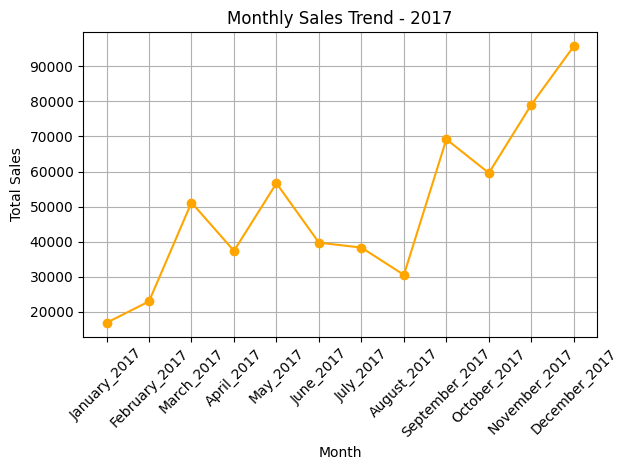

In [20]:
df['year']  = df['Order Date'].dt.year
df1 = df.loc[df['year']==2017]

df1['month'] = df1['Order Date'].dt.month_name()
monthly_sales_2017 = df1.groupby(['month','year'])['Sales'].sum().reset_index()
monthly_sales_2017.sort_values(by='Sales',ascending=False)
monthly_sales_2017['month'] = monthly_sales_2017['month'].astype(str)  + '_' + monthly_sales_2017['year'].astype(str)

month_order = ['January_2017', 'February_2017', 'March_2017', 'April_2017', 'May_2017', 'June_2017',
               'July_2017', 'August_2017', 'September_2017', 'October_2017', 'November_2017', 'December_2017']
monthly_sales_2017['month'] = pd.Categorical(monthly_sales_2017['month'], categories=month_order, ordered=True)
monthly_sales_2017 = monthly_sales_2017.sort_values('month')

# Simple line chart
plt.plot(monthly_sales_2017['month'], monthly_sales_2017['Sales'], marker='o', color='orange')
plt.title("Monthly Sales Trend - 2017")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Insight: Monthly Sales Trend in 2017

- The highest sales occurred in **December**.
- The lowest sales were in **January**.
- This trend helps in planning seasonal inventory and marketing.


C:\Users\abc\AppData\Local\Temp\ipykernel_2928\3000107148.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\abc\AppData\Local\Temp\ipykernel_2928\3000107148.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



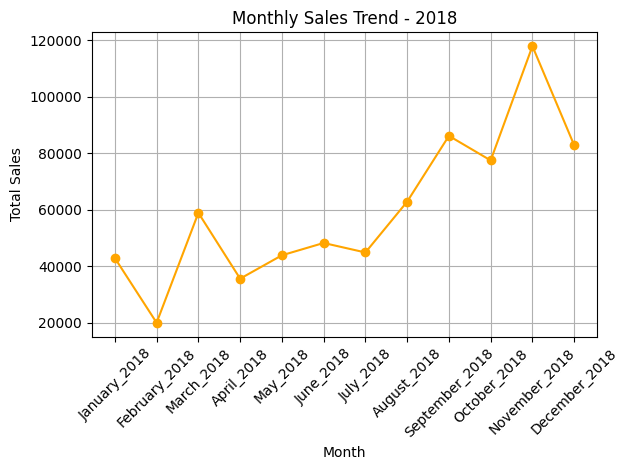

In [21]:
df['year'] = df['Order Date'].dt.year
df1 = df.loc[df['year'] == 2018]

df1['month'] = df1['Order Date'].dt.month_name()
monthly_sales_2018 = df1.groupby(['month', 'year'])['Sales'].sum().reset_index()
monthly_sales_2018.sort_values(by='Sales', ascending=False)

monthly_sales_2018['month'] = monthly_sales_2018['month'].astype(str) + '_' + monthly_sales_2018['year'].astype(str)

month_order = ['January_2018', 'February_2018', 'March_2018', 'April_2018', 'May_2018', 'June_2018',
               'July_2018', 'August_2018', 'September_2018', 'October_2018', 'November_2018', 'December_2018']
monthly_sales_2018['month'] = pd.Categorical(monthly_sales_2018['month'], categories=month_order, ordered=True)
monthly_sales_2018 = monthly_sales_2018.sort_values('month')

# Simple line chart
plt.plot(monthly_sales_2018['month'], monthly_sales_2018['Sales'], marker='o', color='orange')
plt.title("Monthly Sales Trend - 2018")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Insight: Monthly Sales Trend in 2018

- The highest sales occurred in **November**.
- The lowest sales were in **February**.
- This trend helps in planning seasonal inventory and marketing.


📊 Overall Insight (2015–2018):
Sales consistently peak in Q4 (October–December), especially in November and December, while February is the weakest month across most years.

💡 Suggestion for Growth:
Focus marketing and promotional efforts in Q4 to maximize profits, and introduce targeted campaigns or discounts in February to boost sales during the low-demand period.

### Understand how the demand for categories like Technology, Office Supplies, and Furniture changes over time.

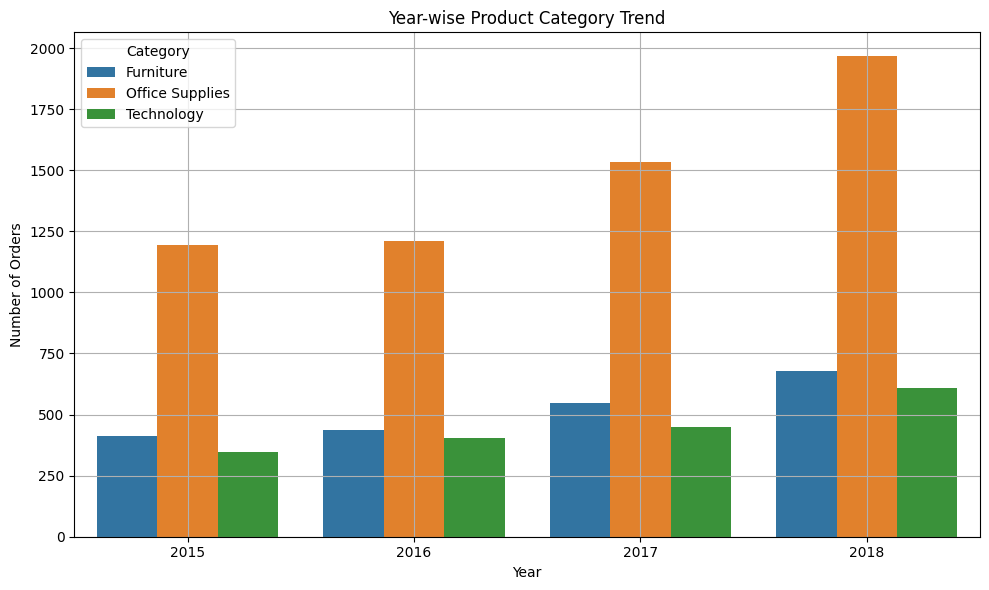

In [22]:
#df['quater'] = df['Order Date'].dt.quarter
#df['quater'] = df['year'].astype(str) + '_' + df['quater'].astype(str)

Product_trend = df.groupby(['year','Category'])['Category'].count().reset_index(name='count')
Product_trend.value_counts(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=Product_trend, x='year', y='count', hue='Category')
plt.title('Year-wise Product Category Trend')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()


Use for Growth: Align product development and sourcing strategy accordingly.

In [23]:
high_demand = df.groupby('City')['City'].count().sort_values(ascending=False).head(10)
high_demand
low_demand = df.groupby('City')['City'].count().sort_values(ascending=False).tail(10)
low_demand
#high_demand



City
Missouri City    1
Layton           1
Manhattan        1
Margate          1
Tinley Park      1
Vacaville        1
Baytown          1
Antioch          1
Abilene          1
Aberdeen         1
Name: City, dtype: int64

Key Insights from the Data:

>>California is the top state in both sales and profit.

>>Technology category gives the highest profit, even if sales are less than Office Supplies.

>> Standard Class is the most used shipping mode, but First Class gives better value.

>> More Discount ≠ More Profit — High discounts actually reduce profits.

>> Consumer segment buys the most, but Corporate brings in more profit per order.

>> Sales peak around November & December — likely due to holidays and offers.

>> Some products have high sales but low profit, meaning pricing strategies need improvement.

>> Furniture has the lowest profit margin among all categories.

>> Office Supplies are sold in bulk but earn the least profit — careful attention needed!

>> Some regions with fewer orders still generate decent profit — potential markets to explore.

Business Recommendations for Retail Businesses & E-commerce Companies:

>>Focus on high-performing states like California
>>Promote Technology products more — they’re most profitable
>>Cut down on excessive discounts that reduce profits
>>Offer First-Class shipping options to premium customers
>>Target the Corporate segment for higher profit deals
>>Improve pricing on low-margin categories like Furniture & Office Supplies
>> Plan inventory and marketing for holiday months (Nov–Dec)
>> Explore less active regions with good profit potential

